# KS-test 

In this notebook. We want to compare the distribution of the tracker rate over the year. 

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


SMALL_SIZE = 12
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
df_edu = pd.read_csv("../dataset_archive/df_rate_merge_base_whoexclude.csv").fillna(0)
df_control = pd.read_csv("../dataset_archive/df_rate_merge_edu_whoexclude.csv").fillna(0)
df_edu

,trackers,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,google-analytics,0.457135,0.477441,0.482503,0.492796,0.490236,0.473825,0.432323,0.384089,0.343310,0.272823
1,google,0.125508,0.136745,0.140751,0.145647,0.143866,0.139305,0.145925,0.147371,0.157830,0.161836
2,googleapis,0.114437,0.141530,0.160612,0.173074,0.178470,0.176245,0.174854,0.166843,0.156217,0.136857
3,facebook,0.107371,0.112045,0.112545,0.109207,0.100695,0.102420,0.103922,0.100862,0.100028,0.097246
4,googlesyndication,0.065090,0.061307,0.057024,0.054854,0.055299,0.053964,0.052740,0.051850,0.052184,0.048679
...,...,...,...,...,...,...,...,...,...,...,...
207,netscape,0.000000,0.000056,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
208,2mdn,0.000000,0.000000,0.000056,0.000056,0.000056,0.000111,0.000389,0.000111,0.000000,0.000000
209,exoclick,0.000000,0.000000,0.000000,0.000056,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
210,imageg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000056,0.000000,0.000000,0.000000


In [4]:
df_control

,trackers,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,google-analytics,0.485063,0.517886,0.531293,0.547983,0.554492,0.543533,0.510320,0.455466,0.408178,0.327399
1,google,0.126064,0.139138,0.147761,0.159388,0.171460,0.182142,0.192990,0.200946,0.207900,0.207844
2,googleapis,0.116384,0.152601,0.181752,0.206342,0.219583,0.220695,0.218470,0.208623,0.193769,0.150932
3,facebook,0.064701,0.070487,0.073936,0.080334,0.081725,0.094854,0.106259,0.109040,0.120223,0.126620
4,addthis,0.035549,0.037997,0.039277,0.040278,0.038720,0.035549,0.033602,0.029819,0.023588,0.018860
...,...,...,...,...,...,...,...,...,...,...,...
194,ssl-images-amazon,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000056,0.000056,0.000056,0.000111
195,valuecommerce,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000056,0.000000,0.000000
196,plista,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000056,0.000000,0.000000
197,a8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000056,0.000056,0.000056


(5,)


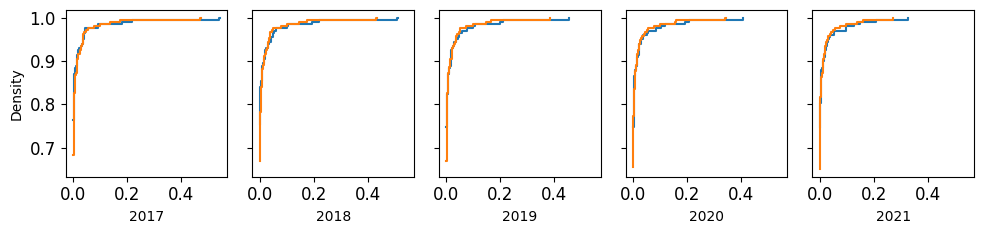

In [5]:
f,axes = plt.subplots(1,5,figsize=(10,2.5), dpi=100, sharex=True, sharey=True)
print(axes.shape)
for e,year in enumerate(range(2017,2022)):
    # axes[e].set_xlim(0, 0.5); axes[e].set_ylim(0.6, 1);

    sns.histplot(df_control[str(year)],bins=len(df_control), stat="density",
                    element="step", fill=False, cumulative=True, common_norm=False,ax = axes[e]);
    sns.histplot(df_edu[str(year)],bins=len(df_edu), stat="density",
                    element="step", fill=False, cumulative=True, common_norm=False,ax = axes[e]); 

# plt.suptitle('Cumulative distribution or tracker rate between edu and non-edu trackers', y=1.05, size=10)
# ax.set_xlim(50, 70); ax.set_ylim(0, 1);
plt.tight_layout();
plt.savefig("../images/section4/ks_test_2.png",dpi = 200) 

In [6]:
# # Import Data
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv')

# # Plot
# fig, axes = plt.subplots(1, 5, figsize=(10,2.5), dpi=100, sharex=True, sharey=True)
# colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive']

# for i, (ax, cut) in enumerate(zip(axes.flatten(), df.cut.unique())):
#     x = df.loc[df.cut==cut, 'depth']
#     ax.hist(x, alpha=0.5, bins=100, density=True, stacked=True, label=str(cut), color=colors[i])
#     ax.set_title(cut)

# plt.suptitle('Probability Histogram of Diamond Depths', y=1.05, size=16)
# ax.set_xlim(50, 70); ax.set_ylim(0, 1);
# plt.tight_layout();

## KS-test of different trackers

In [7]:
from scipy import stats

# KS-test


stat = []
p_value = []

# trackers_average_base = pd.read_csv(
#     "dataset_archive/frame_control_count.csv", sep="\t"
# )
# trackers_average_edu = pd.read_csv("dataset_archive/frame_edu_count.csv", sep="\t")
df_edu
names = df_control.columns
for n in names[1:]:
    result = stats.ks_2samp(df_edu[n], df_control[n])
    stat.append(float("%.2g" % result.statistic))
    p_value.append(float("%.2g" % result.pvalue))

df_result = pd.DataFrame({"year": names[1:], "statistic": stat, "pvalue": p_value})
# df_result.to_csv("pipeline_plot_picture/ks_test.csv", index=None, sep=",")

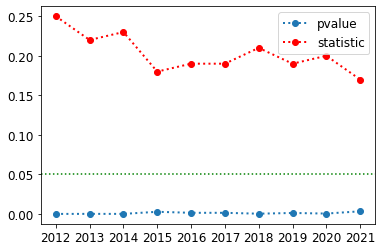

In [8]:

plt.plot(df_result['year'],df_result['pvalue'],marker='o',label = "pvalue", linestyle=':',linewidth = 2)
plt.plot(df_result['year'],df_result['statistic'],marker='o',label = "statistic", linestyle=':',linewidth = 2,color = "red")
plt.axhline(y = 0.05, color = 'green', linestyle = ':')
plt.legend()
df_result[['year','pvalue','statistic']].to_csv("p_values_ks.csv",index = None)
plt.savefig("../images/section4/ks_test_who.png",dpi = 200)

## KS-test of third-parties


In [9]:
df_edu = pd.read_csv("../dataset_archive/df_rate_merge_base_allexclude.csv").fillna(0)
df_control = pd.read_csv("../dataset_archive/df_rate_merge_edu_allexclude.csv").fillna(0)
df_edu.head()

,trackers,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,google-analytics,0.457135,0.477441,0.482503,0.492796,0.490236,0.473825,0.432323,0.384089,0.343310,0.272823
1,google,0.125508,0.136745,0.140751,0.145647,0.143866,0.139305,0.145925,0.147371,0.157830,0.161836
2,googleapis,0.114437,0.141530,0.160612,0.173074,0.178470,0.176245,0.174854,0.166843,0.156217,0.136857
3,facebook,0.107371,0.112045,0.112545,0.109207,0.100695,0.102420,0.103922,0.100862,0.100028,0.097246
4,googlesyndication,0.065090,0.061307,0.057024,0.054854,0.055299,0.053964,0.052740,0.051850,0.052184,0.048679


In [10]:
stat = []
p_value = []

# trackers_average_base = pd.read_csv(
#     "dataset_archive/frame_control_count.csv", sep="\t"
# )
# trackers_average_edu = pd.read_csv("dataset_archive/frame_edu_count.csv", sep="\t")
names = df_control.columns
for n in names[1:]:
    result = stats.ks_2samp(df_edu[n], df_control[n])
    stat.append(float("%.2g" % result.statistic))
    p_value.append(float("%.2g" % result.pvalue))

df_result = pd.DataFrame({"year": names[1:], "statistic": stat, "pvalue": p_value})
# df_result.to_csv("pipeline_plot_picture/ks_test.csv", index=None, sep=",")

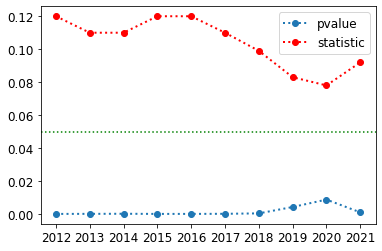

In [11]:
plt.plot(df_result['year'],df_result['pvalue'],marker='o',label = "pvalue", linestyle=':',linewidth = 2)
plt.plot(df_result['year'],df_result['statistic'],marker='o',label = "statistic", linestyle=':',linewidth = 2,color = "red")
plt.axhline(y = 0.05, color = 'green', linestyle = ':')
# plt.xlabel("Year",fontsize=12)
plt.legend()
plt.savefig("../images/section4/ks_test_all.png",dpi = 200)